In [1]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 3.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [51]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [52]:
from copy import copy
import numpy as np
from numpy import dot
from numpy.linalg import norm
import pandas as pd

In [53]:
from google import colab
colab.drive.mount('./MyDrive')

Drive already mounted at ./MyDrive; to attempt to forcibly remount, call drive.mount("./MyDrive", force_remount=True).


In [54]:
import json
with open('./MyDrive/MyDrive/combined_sentences.json', 'r', encoding='utf-8') as f:
  sentences = json.load(f)

In [55]:
sentences.keys()

dict_keys(['f22_sentences', 'f23_sentences', 'tsla22_sentences', 'tsla23_sentences', 'ups22_sentences', 'ups23_sentences'])

In [56]:
transformedSentences = model.encode(sentences['f22_sentences'])
cos_sim = lambda a,b: dot(a, b)/(norm(a)*norm(b))

def semanticSorting(transformedSentencesDataFrame, targetSentence):
  transformedSentencesSorted=transformedSentencesDataFrame.copy()
  transformedSentencesSorted['cos']=transformedSentencesSorted.apply(lambda x: cos_sim(x, targetSentence), axis=1)
  transformedSentencesSorted.sort_values('cos', inplace=True, ascending=False)
  return transformedSentencesSorted

In [35]:
!pip install ruptures

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.7 MB/s eta 0:00:00


1100 Full year 2021 revenue improved 8% from 2020, driven by favorable mix, stronger currencies, and higher net pricing, partially offset by lower volume.
940 Full year 2022 revenue increased 29%, driven by higher net pricing, offset partially by weaker currencies.
1090 Full year 2021 revenue increased 10% from 2020, driven by higher net pricing, favorable mix, and stronger currencies, partially offset by lower wholesales.


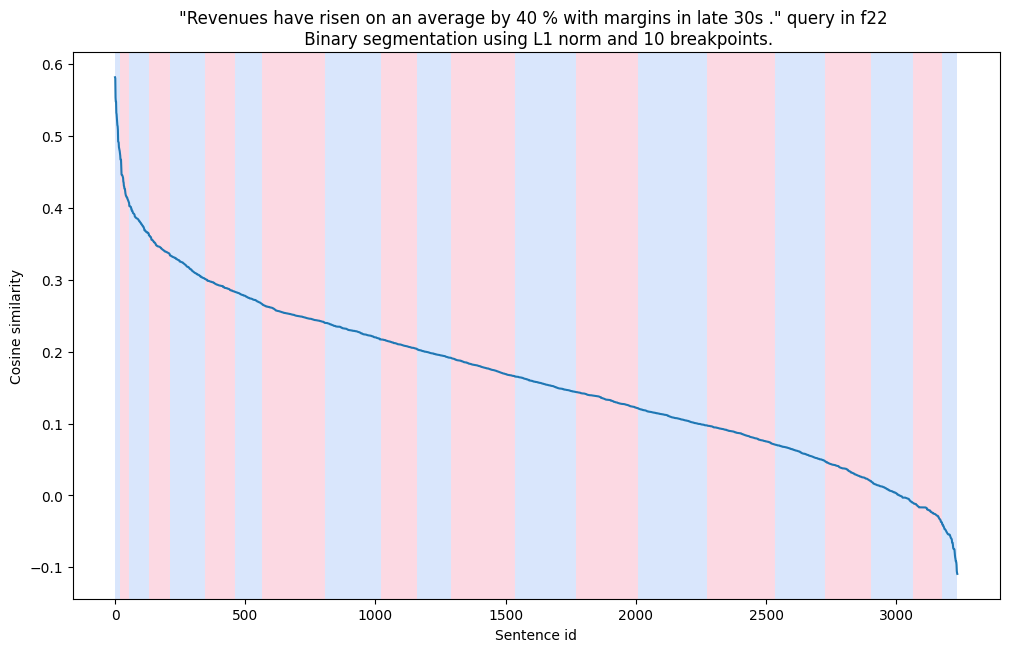

[20, 55, 130, 210, 345, 460, 565, 805, 1020, 1160, 1290, 1535, 1770, 2010, 2275, 2535, 2725, 2905, 3065, 3175, 3235]


In [60]:
targetRawSentence = 'Revenues have risen on an average by 40 % with margins in late 30s .'
targetSentence = model.encode([targetRawSentence])[0]
TransformedSentencesSorted = semanticSorting(pd.DataFrame(list(transformedSentences)), targetSentence)
for ind, row in TransformedSentencesSorted.head(3).iterrows():
  print(ind,sentences['f22_sentences'][ind])
data = np.array(list(TransformedSentencesSorted['cos'].values))
modelb = "l1"
algo = rpt.Binseg(model=modelb).fit(data)

my_bkps = algo.predict(n_bkps=20)

rpt.display(data, my_bkps, figsize=(10, 6))
plt.title(f'"{targetRawSentence}" query in f22 \n Binary segmentation using L1 norm and 20 breakpoints.')
plt.xlabel('Sentence id')
plt.ylabel('Cosine similarity')
plt.show()

print(my_bkps)

919 Net income/(loss) margin was negative 1.3% in 2022, down from 13.2% a year ago.
1533 The lower returns are explained by losses on fixed income and growth assets, both of which were consistent with broader market performance.
1635 Long-term growth rate.


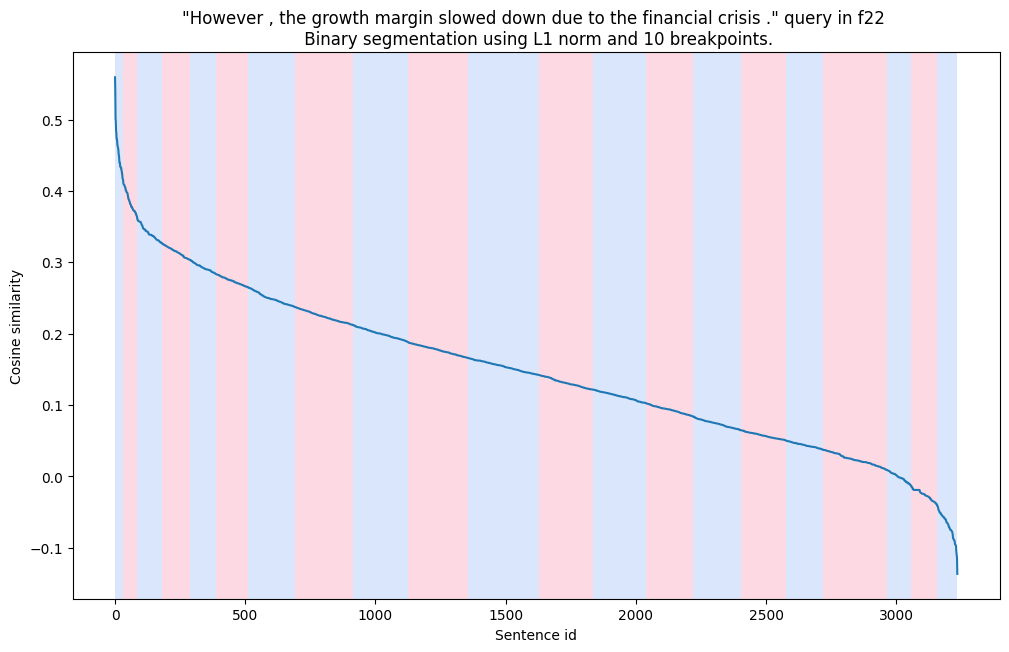

[30, 85, 180, 290, 390, 510, 690, 915, 1125, 1355, 1630, 1835, 2040, 2220, 2405, 2575, 2720, 2965, 3055, 3155, 3235]


In [59]:
targetRawSentence = 'However , the growth margin slowed down due to the financial crisis .'
targetSentence = model.encode([targetRawSentence])[0]
TransformedSentencesSorted = semanticSorting(pd.DataFrame(list(transformedSentences)), targetSentence)
for ind, row in TransformedSentencesSorted.head(3).iterrows():
  print(ind,sentences['f22_sentences'][ind])
data = np.array(list(TransformedSentencesSorted['cos'].values))
modelb = "l1"
algo = rpt.Binseg(model=modelb).fit(data)

my_bkps = algo.predict(n_bkps=20)

rpt.display(data, my_bkps, figsize=(10, 6))
plt.title(f'"{targetRawSentence}" query in f22 \n Binary segmentation using L1 norm and 20 breakpoints.')
plt.xlabel('Sentence id')
plt.ylabel('Cosine similarity')
plt.show()

print(my_bkps)

In [96]:
from tqdm import tqdm

def semantic_search_with_binary_segmentation(sentences_dictionary, query_sentences):
  selected_sentences_dictionary={}

  def semantic_sorting(transformedSentencesDataFrame, targetSentence):
    cos_sim = lambda a,b: dot(a, b)/(norm(a)*norm(b))
    transformedSentencesSorted=transformedSentencesDataFrame.copy()
    transformedSentencesSorted['cos']=transformedSentencesSorted.apply(lambda x: cos_sim(x, targetSentence), axis=1)
    transformedSentencesSorted.sort_values('cos', inplace=True, ascending=False)
    return transformedSentencesSorted

  for name, sentence_list in tqdm(sentences_dictionary.items()):
    temp_selected_sentences=[]
    for query in tqdm(query_sentences):
      targetSentence=model.encode([query])[0]
      transformedSentences = model.encode(sentence_list)
      transformedSentencesSorted2 = semanticSorting(pd.DataFrame(list(transformedSentences)), targetSentence)
      data = np.array(list(transformedSentencesSorted2['cos'].values))
      modelb = "l1"
      algo = rpt.Binseg(model=modelb).fit(data)
      my_bkps = algo.predict(n_bkps=20)
      for ind, row in transformedSentencesSorted2.head(my_bkps[0]).iterrows():
        temp_selected_sentences.append(sentence_list[ind])
    selected_sentences_dictionary[name]=temp_selected_sentences

  return selected_sentences_dictionary

In [97]:
%%time
query_list_sentences = ['Revenues have risen on an average by 40 % with margins in late 30s .',
                        'However , the growth margin slowed down due to the financial crisis .',
                        'Sales of mid-strength beer decreased by 40 %',
                        "Benefon 's target is to lay off temporarily of permanently up to 20 % of the Salo plant 's staff .",
                        'Return on investment ROI was 4.1 % compared to 43.8 % in the first half of 2008 .',
                        'Earnings per share ( EPS ) amounted to a loss of EUR0 .05 .',
                        'Operating loss totaled EUR 0.8 mn , compared to a profit of EUR 0.5 mn .',
                        'Operating loss totalled EUR 12.7 mn , compared to a profit of EUR 17.7 mn in the first half of 2008 .',
                        "For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",
                        "Lifetree was founded in 2000 , and its revenues have risen on an average by 40 % with margins in late 30s ",
                        "Commission income increased by 22 % to EUR 4.4 mn , and lending volume rose by 13.5 % .",
                        "Sales have risen in other export markets .",
                        "Shares of Standard Chartered ( STAN ) rose 1.2 % in the FTSE 100 , while Royal Bank of Scotland ( RBS ) shares rose 2 % and Barclays shares ( BARC ) ( BCS ) were up 1.7 % .",
                        "Circulation revenue has increased by 5 % in Finland and 4 % in Sweden in 2008 .",
                        "Net sales grew in the period to x20ac 402 million $ 585US million from 401 million in 2006 .",
                        "Operating profit rose to EUR 5mn from EUR 2.8 mn in the fourth quarter of 2008 ."]

combined_selected_sentences = semantic_search_with_binary_segmentation(sentences, query_list_sentences)

100%|██████████| 6/6 [03:31<00:00, 35.29s/it]

CPU times: user 3min 34s, sys: 2.19 s, total: 3min 37s
Wall time: 3min 31s


In [98]:
combined_selected_sentences.keys()

dict_keys(['f22_sentences', 'f23_sentences', 'tsla22_sentences', 'tsla23_sentences', 'ups22_sentences', 'ups23_sentences'])

In [99]:
combined_selected_sentences['ups23_sentences']

['Excluding the impact of currency, domestic revenue per piece increased 5.2%.',
 'Domestic revenue per piece increased 4.3%, primarily due to base rate increases and favorable shifts in customer mix.',
 'These were somewhat offset by revenue per piece growth due to increases in base rates and changes in customer mix.',
 'Capital Expenditures as a % of revenue                                       5.7 %        4.8 %',
 'The change in revenue was due to the following factors:',
 'The change in revenue was due to the following:',
 'Total revenue per piece decreased 1.0%, primarily due to declines in fuel and demand-related surcharges, as well as unfavorable currency movements during the first half of the year.',
 'We anticipate moderate revenue per piece growth in 2024 as we continue to execute on pricing initiatives within our strategy.',
 'We expect overall revenue per piece to decline in 2024 driven by a continued shift to non-premium products as the challenging economic outlook persi

In [100]:
combined_selected_sentences_no_duplicates={x:list(set(combined_selected_sentences[x])) for x in combined_selected_sentences}

In [101]:
import json
with open('./MyDrive/MyDrive/combined_selected_sentences_no_duplicates.json', 'w', encoding='utf-8') as f:
  json.dump(combined_selected_sentences_no_duplicates, f, ensure_ascii=False)